IMPORTAMOS LAS LIBRERIAS NECESARIAS

In [67]:
import requests
import pandas as pd
import numpy as np
from io import StringIO
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

OBTENEMOS LOS DATOS ATRAVES DE LA API

In [34]:
# URL de la API que contiene el dataset
URL = "https://storage.googleapis.com/the_public_bucket/wine-clustering.csv"

# Realizar petición GET a la API
response = requests.get(URL)

# Verificar que la respuesta sea exitosa (codigo 200)
if response.status_code == 200:
    print("Datos obtenidos exitosamente!")
else:
    print("Ocurrió un error al obtener los datos")


Datos obtenidos exitosamente!


LO PASAMOS A UN DATAFRAME

In [35]:
# Leer respuesta como CSV directamente en un DataFrame de Pandas
response_content = response.text

# Use StringIO to create a file-like object from the response content
csv_file = StringIO(response_content)

# Read the CSV directly from the file-like object
df = pd.read_csv(csv_file)

# Mostrar las primeras 5 filas
print(df.head())

# Opcional: guardar dataframe en un archivo CSV local
df.to_csv("vinos.csv", index=False)


   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

REALIZAMOS UN EDA

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [38]:
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

In [39]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

PREPARAMOS LOS DATOS

In [40]:
df[df.duplicated()]

Empty DataFrame
Columns: [Alcohol, Malic_Acid, Ash, Ash_Alcanity, Magnesium, Total_Phenols, Flavanoids, Nonflavanoid_Phenols, Proanthocyanins, Color_Intensity, Hue, OD280, Proline]
Index: []

ANALISIS DE DISTRIBUCION

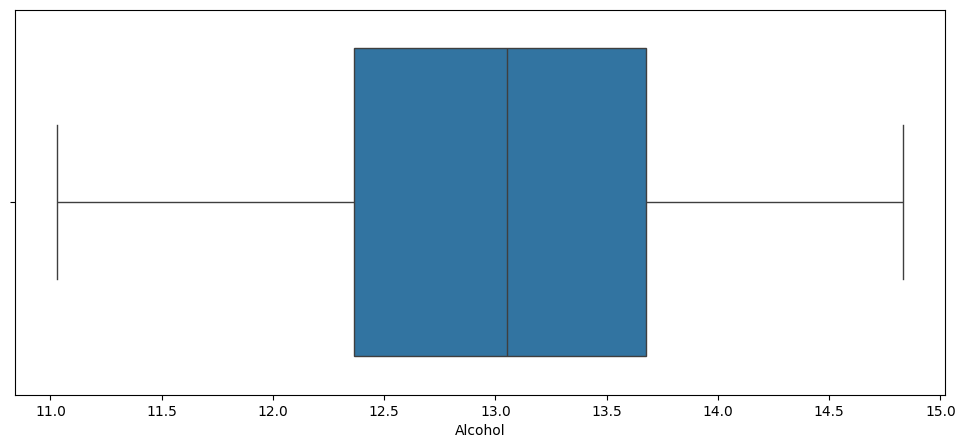

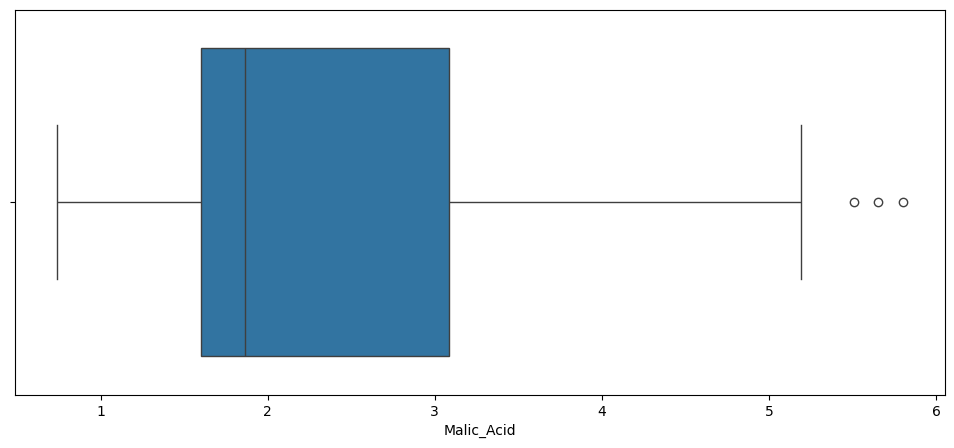

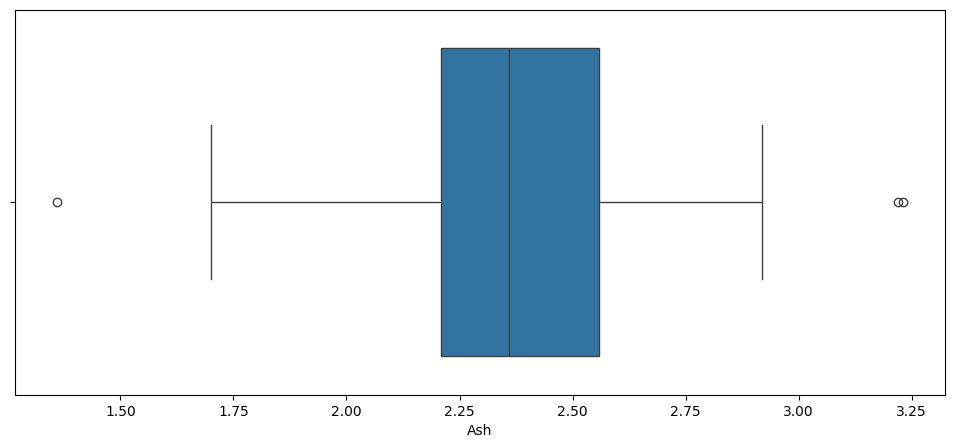

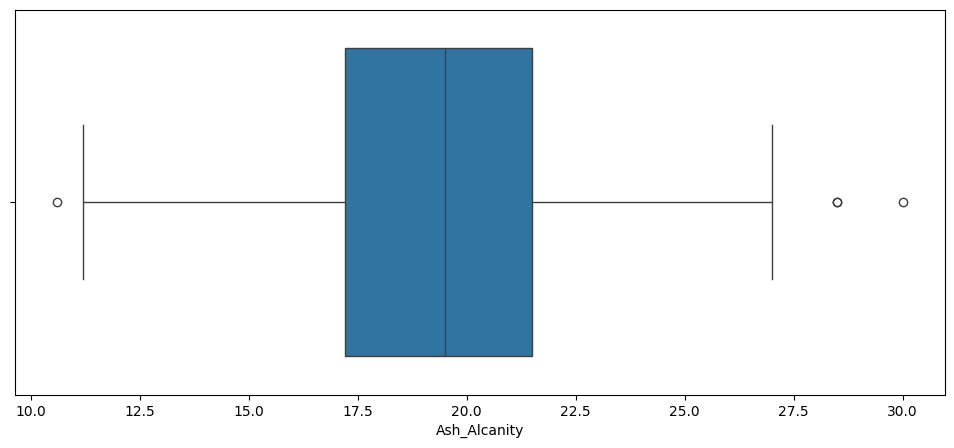

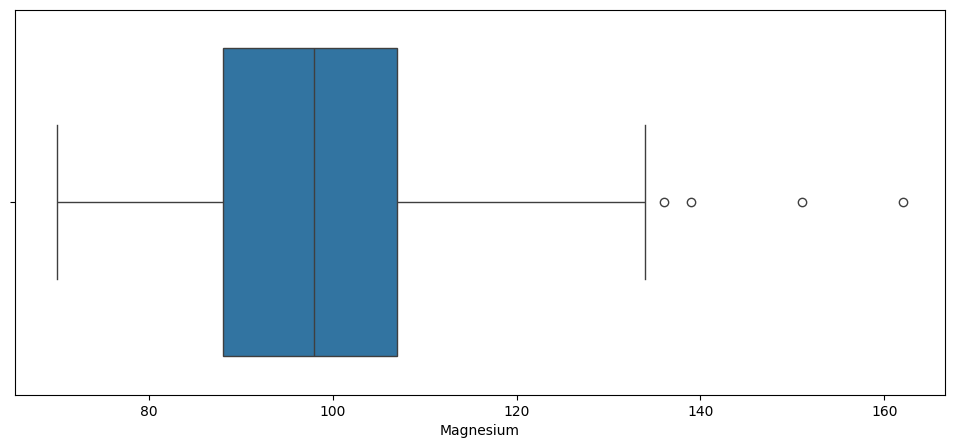

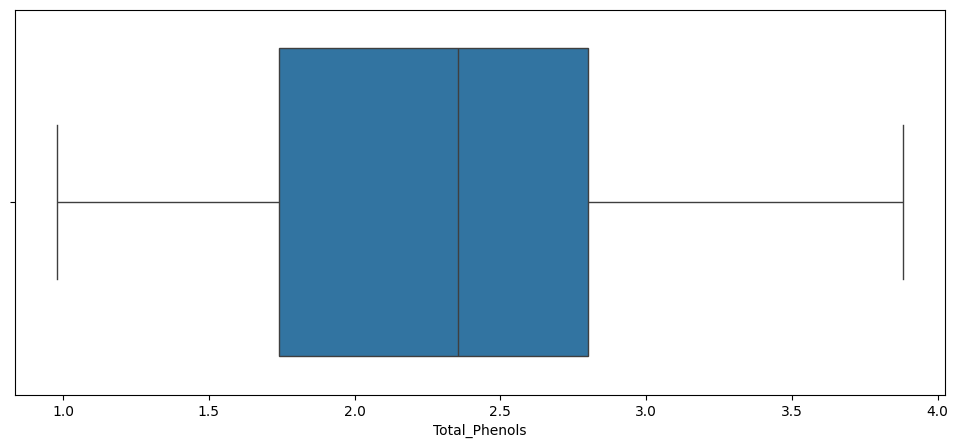

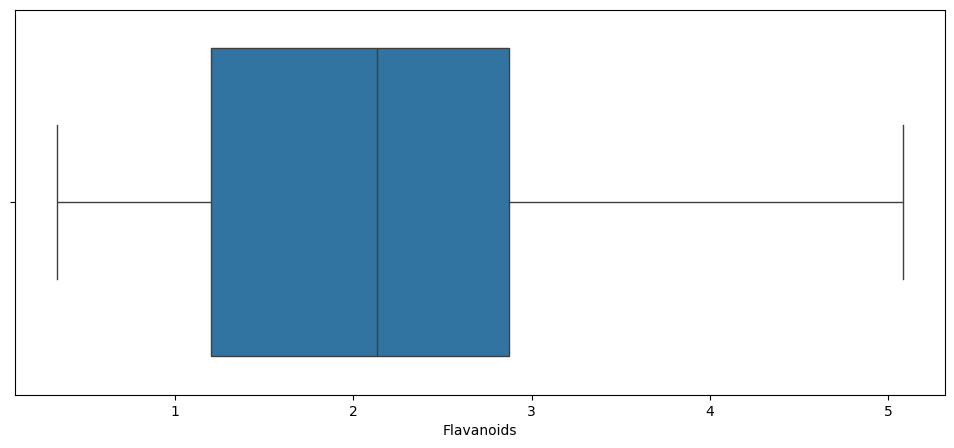

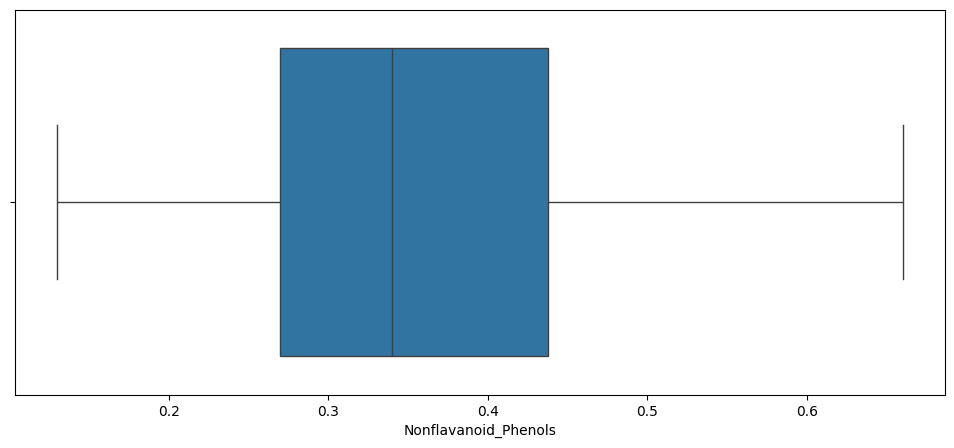

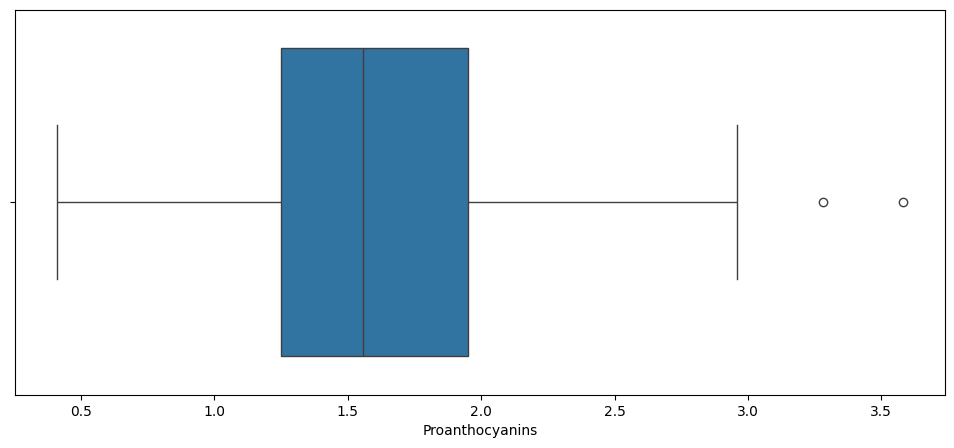

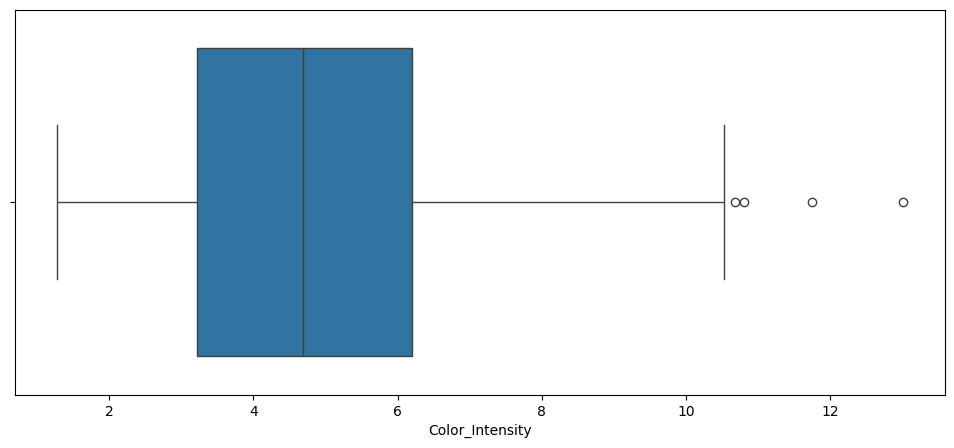

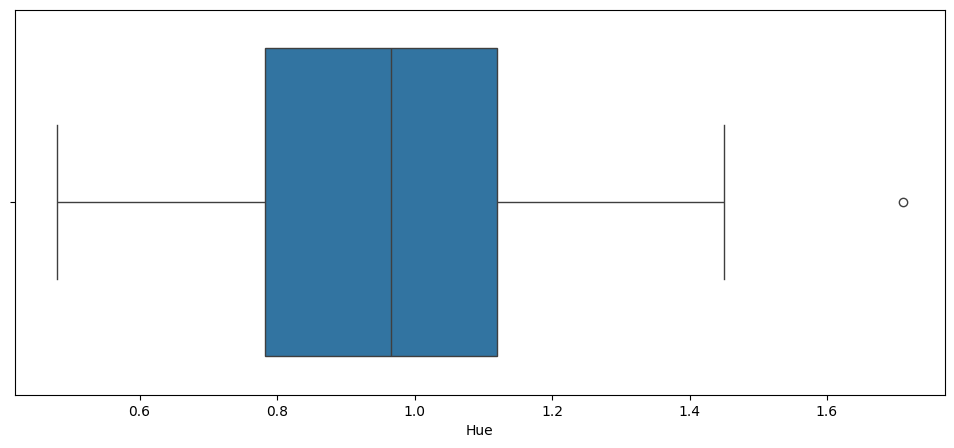

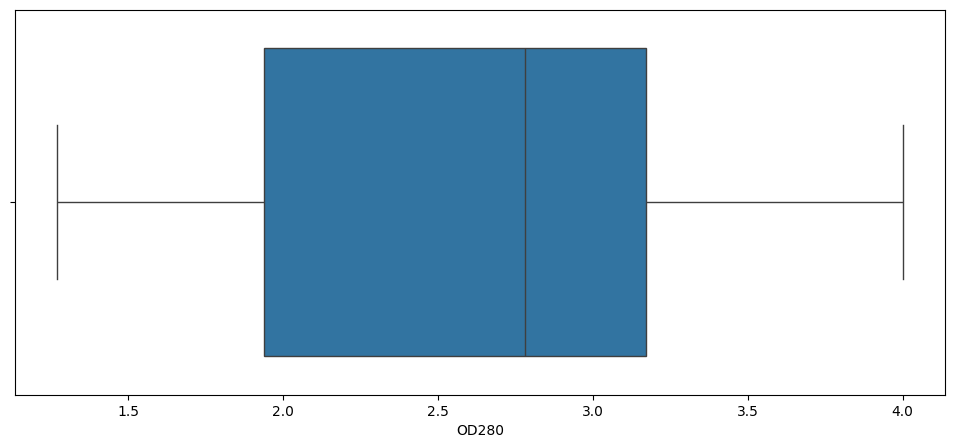

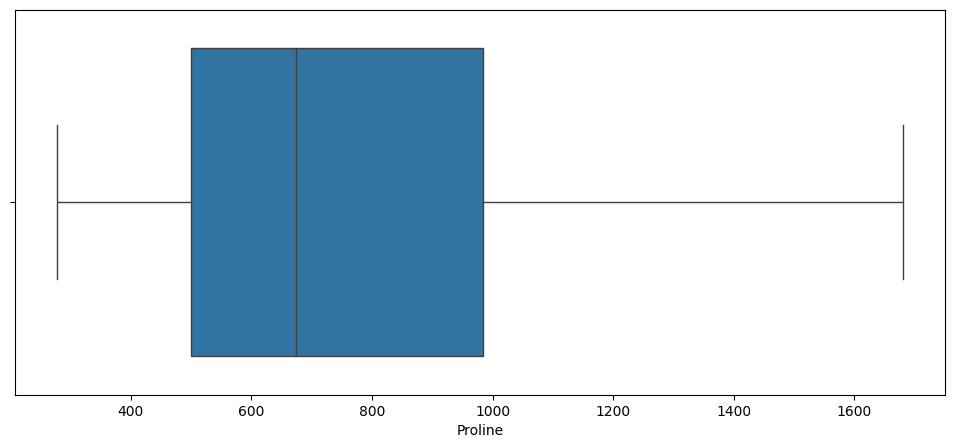

In [41]:
for _ in df:
  plt.figure(figsize=(12,5))
  sns.boxplot(data=df, x = _)
  plt.show()

REVISAMOS CORRELACION ENTRE VARIABLES

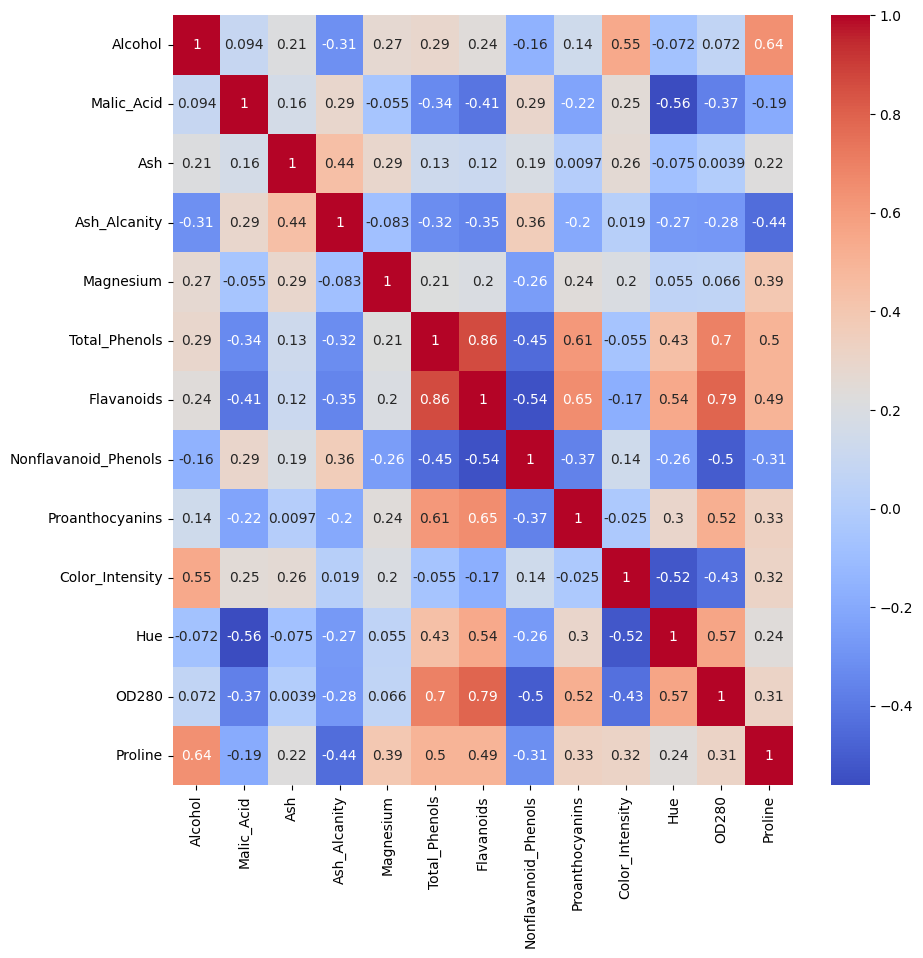

In [ ]:
# Calcula la matriz de correlación
corr = df.corr()

fig, ax = plt.subplots(figsize=(10, 10))
# Grafica la matriz de correlación
sns.heatmap(corr,annot=True, cmap='coolwarm',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values
            )

plt.show()


ESCALAMOS DATOS

In [47]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [51]:
df_scaled  = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1    0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2    0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3    1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4    0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   
..        ...         ...       ...           ...        ...            ...   
173  0.876275    2.974543  0.305159      0.301803  -0.332922      -0.985614   
174  0.493343    1.412609  0.414820      1.052516   0.158572      -0.793334   
175  0.332758    1.744744 -0.389355      0.151661   1.422412      -1.129824   
176  0.209232    0.227694  0.012732      0.151661   1.422412      -1.033684   
177  1.395086    1.583165  1.365208      1.502943  -0.262708      -0.392751   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0      1.034819             -0.659563         1.224884         0.251717   
1      0.733629             -0.820719        -0.544721        -0.293321   
2      1.215533             -0.498407         2.135968         0.269020   
3      1.466525             -0.981875         1.032155         1.186068   
4      0.663351              0.226796         0.401404        -0.319276   
..          ...                   ...              ...              ...   
173   -1.424900              1.274310        -0.930179         1.142811   
174   -1.284344              0.549108        -0.316950         0.969783   
175   -1.344582              0.549108        -0.422075         2.224236   
176   -1.354622              1.354888        -0.229346         1.834923   
177   -1.274305              1.596623        -0.422075         1.791666   

          Hue     OD280   Proline  
0    0.362177  1.847920  1.013009  
1    0.406051  1.113449  0.965242  
2    0.318304  0.788587  1.395148  
3   -0.427544  1.184071  2.334574  
4    0.362177  0.449601 -0.037874  
..        ...       ...       ...  
173 -1.392758 -1.231206 -0.021952  
174 -1.129518 -1.485445  0.009893  
175 -1.612125 -1.485445  0.280575  
176 -1.568252 -1.400699  0.296498  
177 -1.524378 -1.428948 -0.595160  

[178 rows x 13 columns]

REALIZAMOS UNA REDUCCION DE DIMENSIONALIDAD

In [53]:
pca = PCA()
pca.fit(df_scaled)
pca_data_scaled = pca.transform(df_scaled)
pca_data_scaled

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [54]:
var = pca.explained_variance_ratio_
print(var)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


REVISAMOS CON CUANTAS VARIABLES VAMOS A TRABAJAR

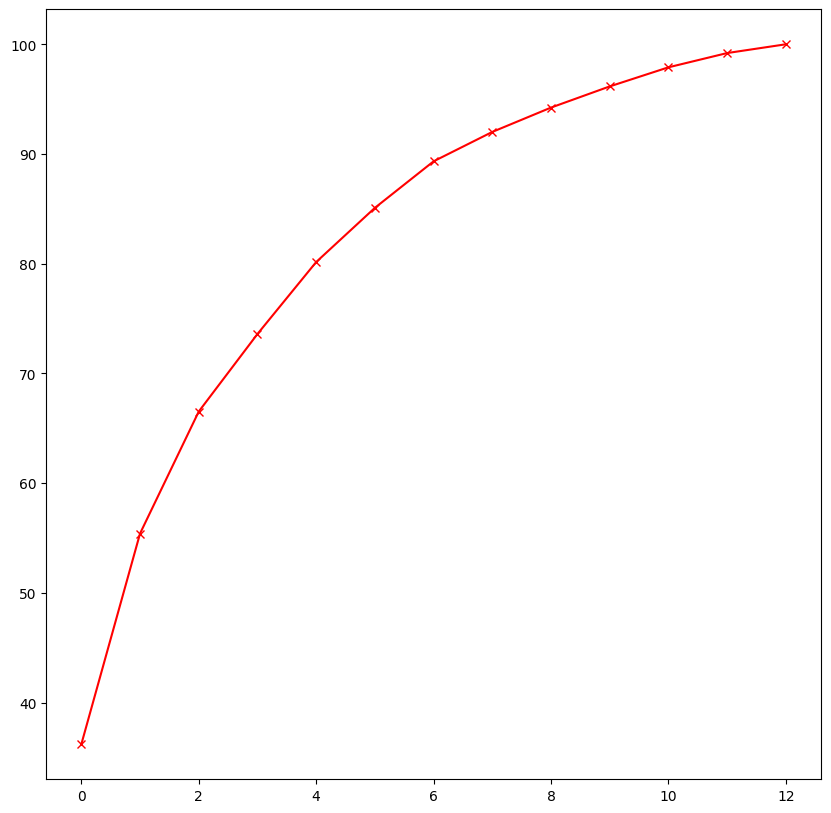

In [56]:
cum_var = np.cumsum(np.round(var, decimals = 4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

In [57]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([6,7,8,9,10,11,12], axis = 1, inplace = True)

In [58]:
pca_data_standard

0         1         2         3         4         5
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120
2    2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431
4    1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520
..        ...       ...       ...       ...       ...       ...
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164 -1.108788
174 -2.601956 -1.757229  0.207581  0.349496  0.255063 -0.026465
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355  0.273068
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955  1.178783
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193  0.296092

[178 rows x 6 columns]

PROBAMOS EL ALGORITMO DE KMEANS

In [68]:
sum_of_squared_distances = []
silhouette_scores_list = []
K = range(2,15)
for _ in K:
  km= KMeans(n_clusters= _)
  y = km.fit_predict(pca_data_standard)
  sum_of_squared_distances.append(km.inertia_)
  silhouette_scores_list.append(silhouette_score(pca_data_standard, y))


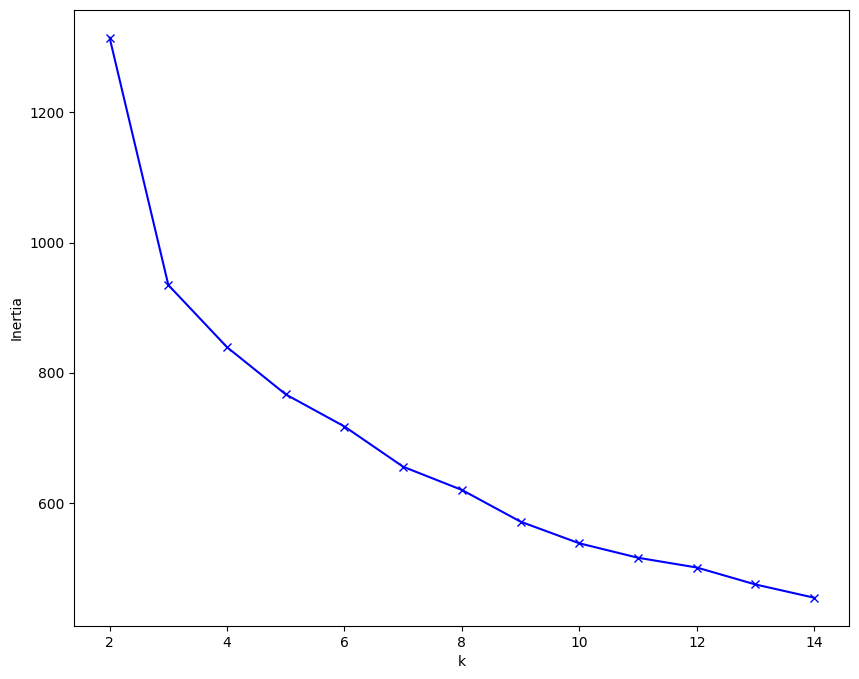

In [70]:
fig = plt.figure(figsize=(10,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

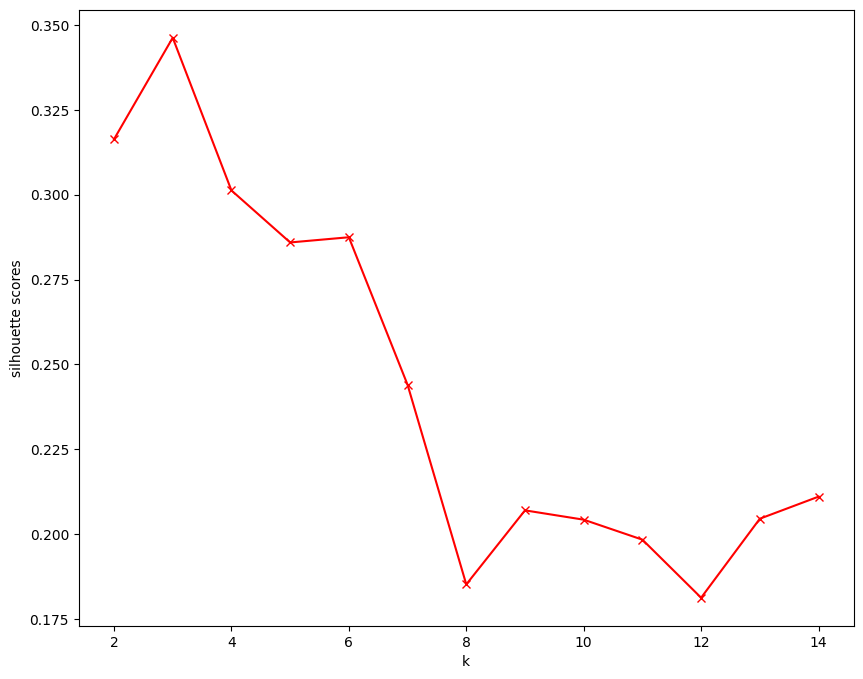

In [71]:
fig = plt.figure(figsize=(10,8))
plt.plot(K, silhouette_scores_list, 'rx-')
plt.xlabel('k')
plt.ylabel('silhouette scores')
plt.show()

VERIFICAMOS EL SCORE

In [78]:
km =KMeans(n_clusters = 2)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))
df_scaled['k_means_pca'] = y

0.3163402659213099


SIN PCA

In [73]:
sum_of_squared_distances = []
silhouette_scores_list = []
K = range(2,15)
for _ in K:
  km= KMeans(n_clusters= _)
  y = km.fit_predict(df_scaled)
  sum_of_squared_distances.append(km.inertia_)
  silhouette_scores_list.append(silhouette_score(df_scaled, y))

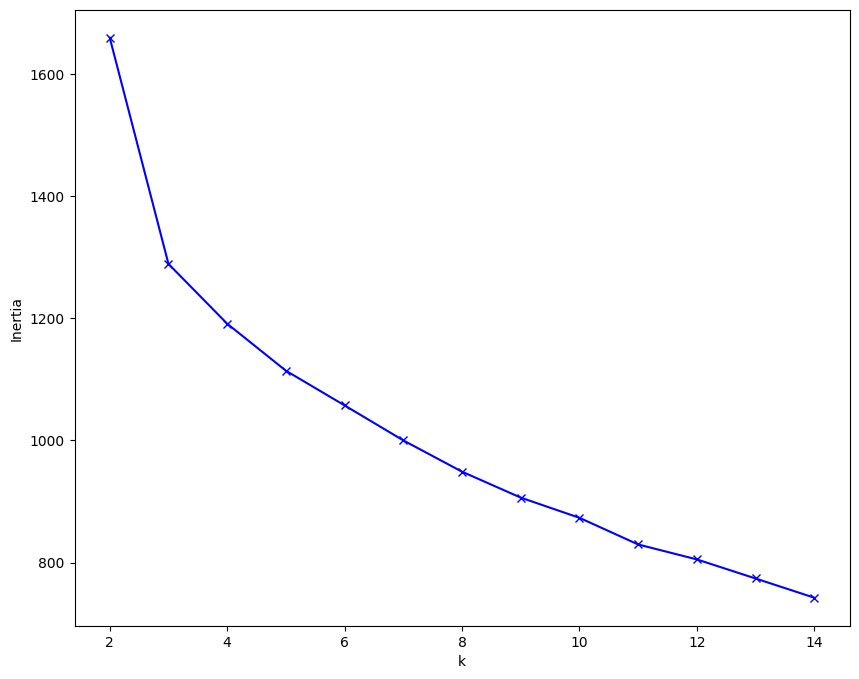

In [74]:
fig = plt.figure(figsize=(10,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

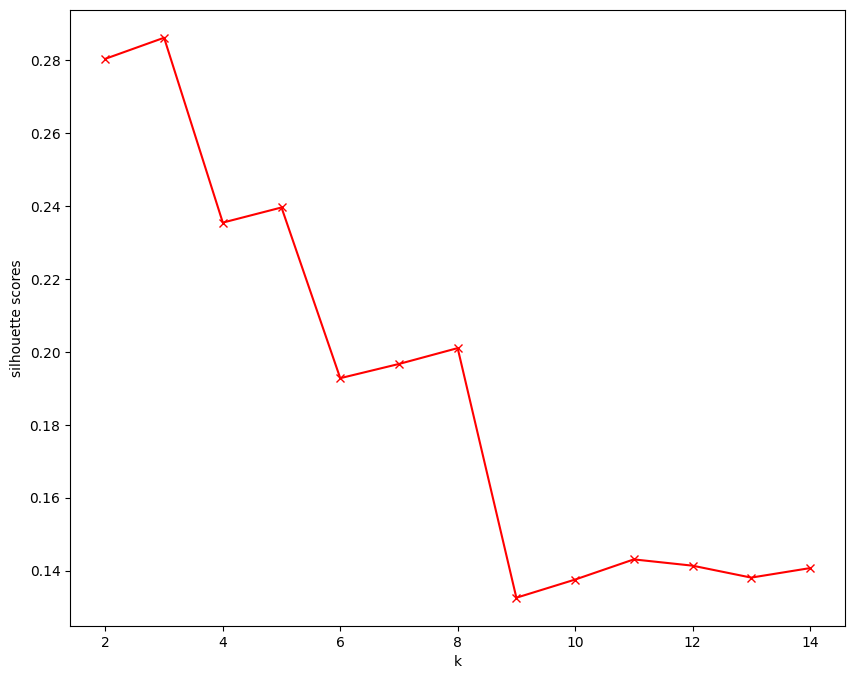

In [75]:
fig = plt.figure(figsize=(10,8))
plt.plot(K, silhouette_scores_list, 'rx-')
plt.xlabel('k')
plt.ylabel('silhouette scores')
plt.show()

CHEQUEAMOS EL SCORE SIN PCA

In [77]:
km  = KMeans(n_clusters = 2)
y = km.fit_predict(df_scaled)
print(silhouette_score(df_scaled, y))
df_scaled['k_means'] = y

0.28033433141112135


Agglomeritiven hierarchical clustering

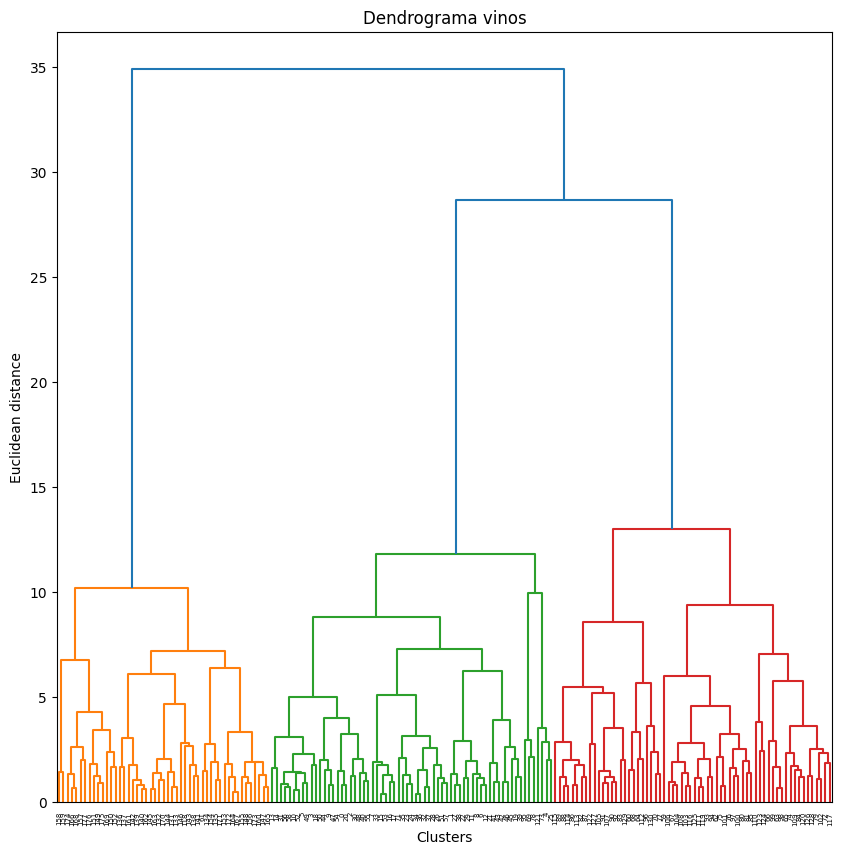

In [79]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(pca_data_standard, method = 'ward'))
plt.title('Dendrograma vinos')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

CHEQUEAMOS EL SCORE CON AgglomerativeClustering

In [82]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_hc))
df_scaled['hc_pca'] = y_hc

0.33731591385589565


SIN PCA

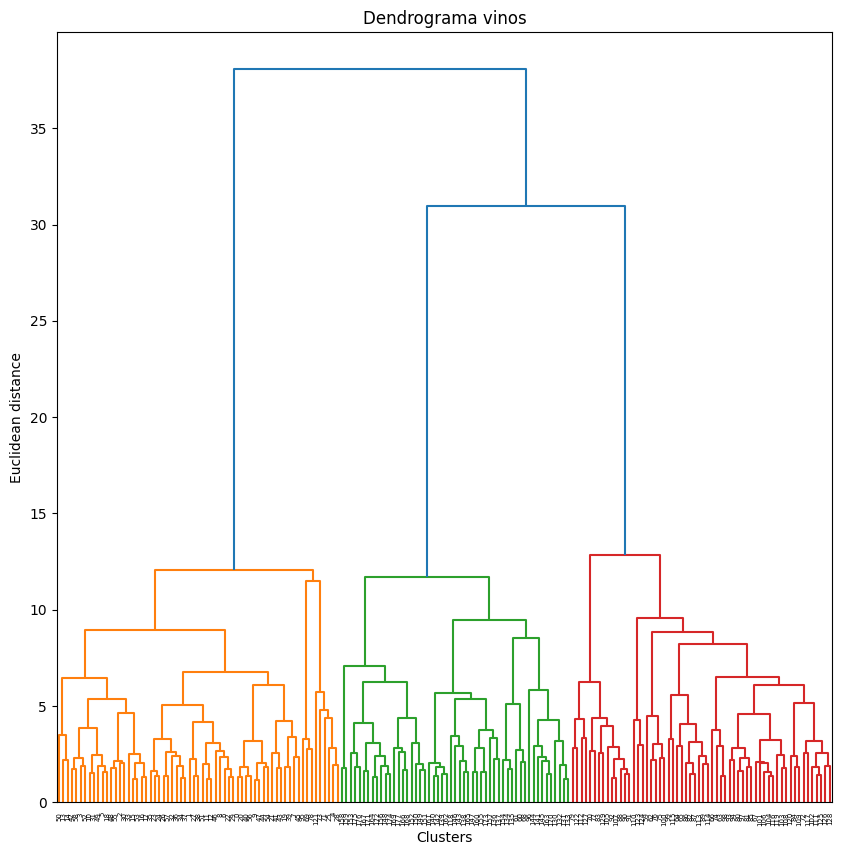

In [83]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_scaled, method = 'ward'))
plt.title('Dendrograma vinos')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

CHEQUEAMOS RESULTADOS SIN PCA

In [84]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_scaled)
print(silhouette_score(df_scaled, y_hc))
df_scaled['hc_sin_pca'] = y_hc

0.3139187387857897


EVALUACION DE RESULTADOS DE AgglomerativeClustering (EL QUE DIO MEJOR RESULTADO)


In [88]:
df_scaled.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'k_means_pca', 'k_means', 'hc_pca', 'hc_sin_pca'],
      dtype='object')

In [89]:
df_scaled[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'hc_pca']]

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1    0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2    0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3    1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4    0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   
..        ...         ...       ...           ...        ...            ...   
173  0.876275    2.974543  0.305159      0.301803  -0.332922      -0.985614   
174  0.493343    1.412609  0.414820      1.052516   0.158572      -0.793334   
175  0.332758    1.744744 -0.389355      0.151661   1.422412      -1.129824   
176  0.209232    0.227694  0.012732      0.151661   1.422412      -1.033684   
177  1.395086    1.583165  1.365208      1.502943  -0.262708      -0.392751   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0      1.034819             -0.659563         1.224884         0.251717   
1      0.733629             -0.820719        -0.544721        -0.293321   
2      1.215533             -0.498407         2.135968         0.269020   
3      1.466525             -0.981875         1.032155         1.186068   
4      0.663351              0.226796         0.401404        -0.319276   
..          ...                   ...              ...              ...   
173   -1.424900              1.274310        -0.930179         1.142811   
174   -1.284344              0.549108        -0.316950         0.969783   
175   -1.344582              0.549108        -0.422075         2.224236   
176   -1.354622              1.354888        -0.229346         1.834923   
177   -1.274305              1.596623        -0.422075         1.791666   

          Hue     OD280   Proline  hc_pca  
0    0.362177  1.847920  1.013009       2  
1    0.406051  1.113449  0.965242       2  
2    0.318304  0.788587  1.395148       2  
3   -0.427544  1.184071  2.334574       2  
4    0.362177  0.449601 -0.037874       2  
..        ...       ...       ...     ...  
173 -1.392758 -1.231206 -0.021952       1  
174 -1.129518 -1.485445  0.009893       1  
175 -1.612125 -1.485445  0.280575       1  
176 -1.568252 -1.400699  0.296498       1  
177 -1.524378 -1.428948 -0.595160       1  

[178 rows x 14 columns]

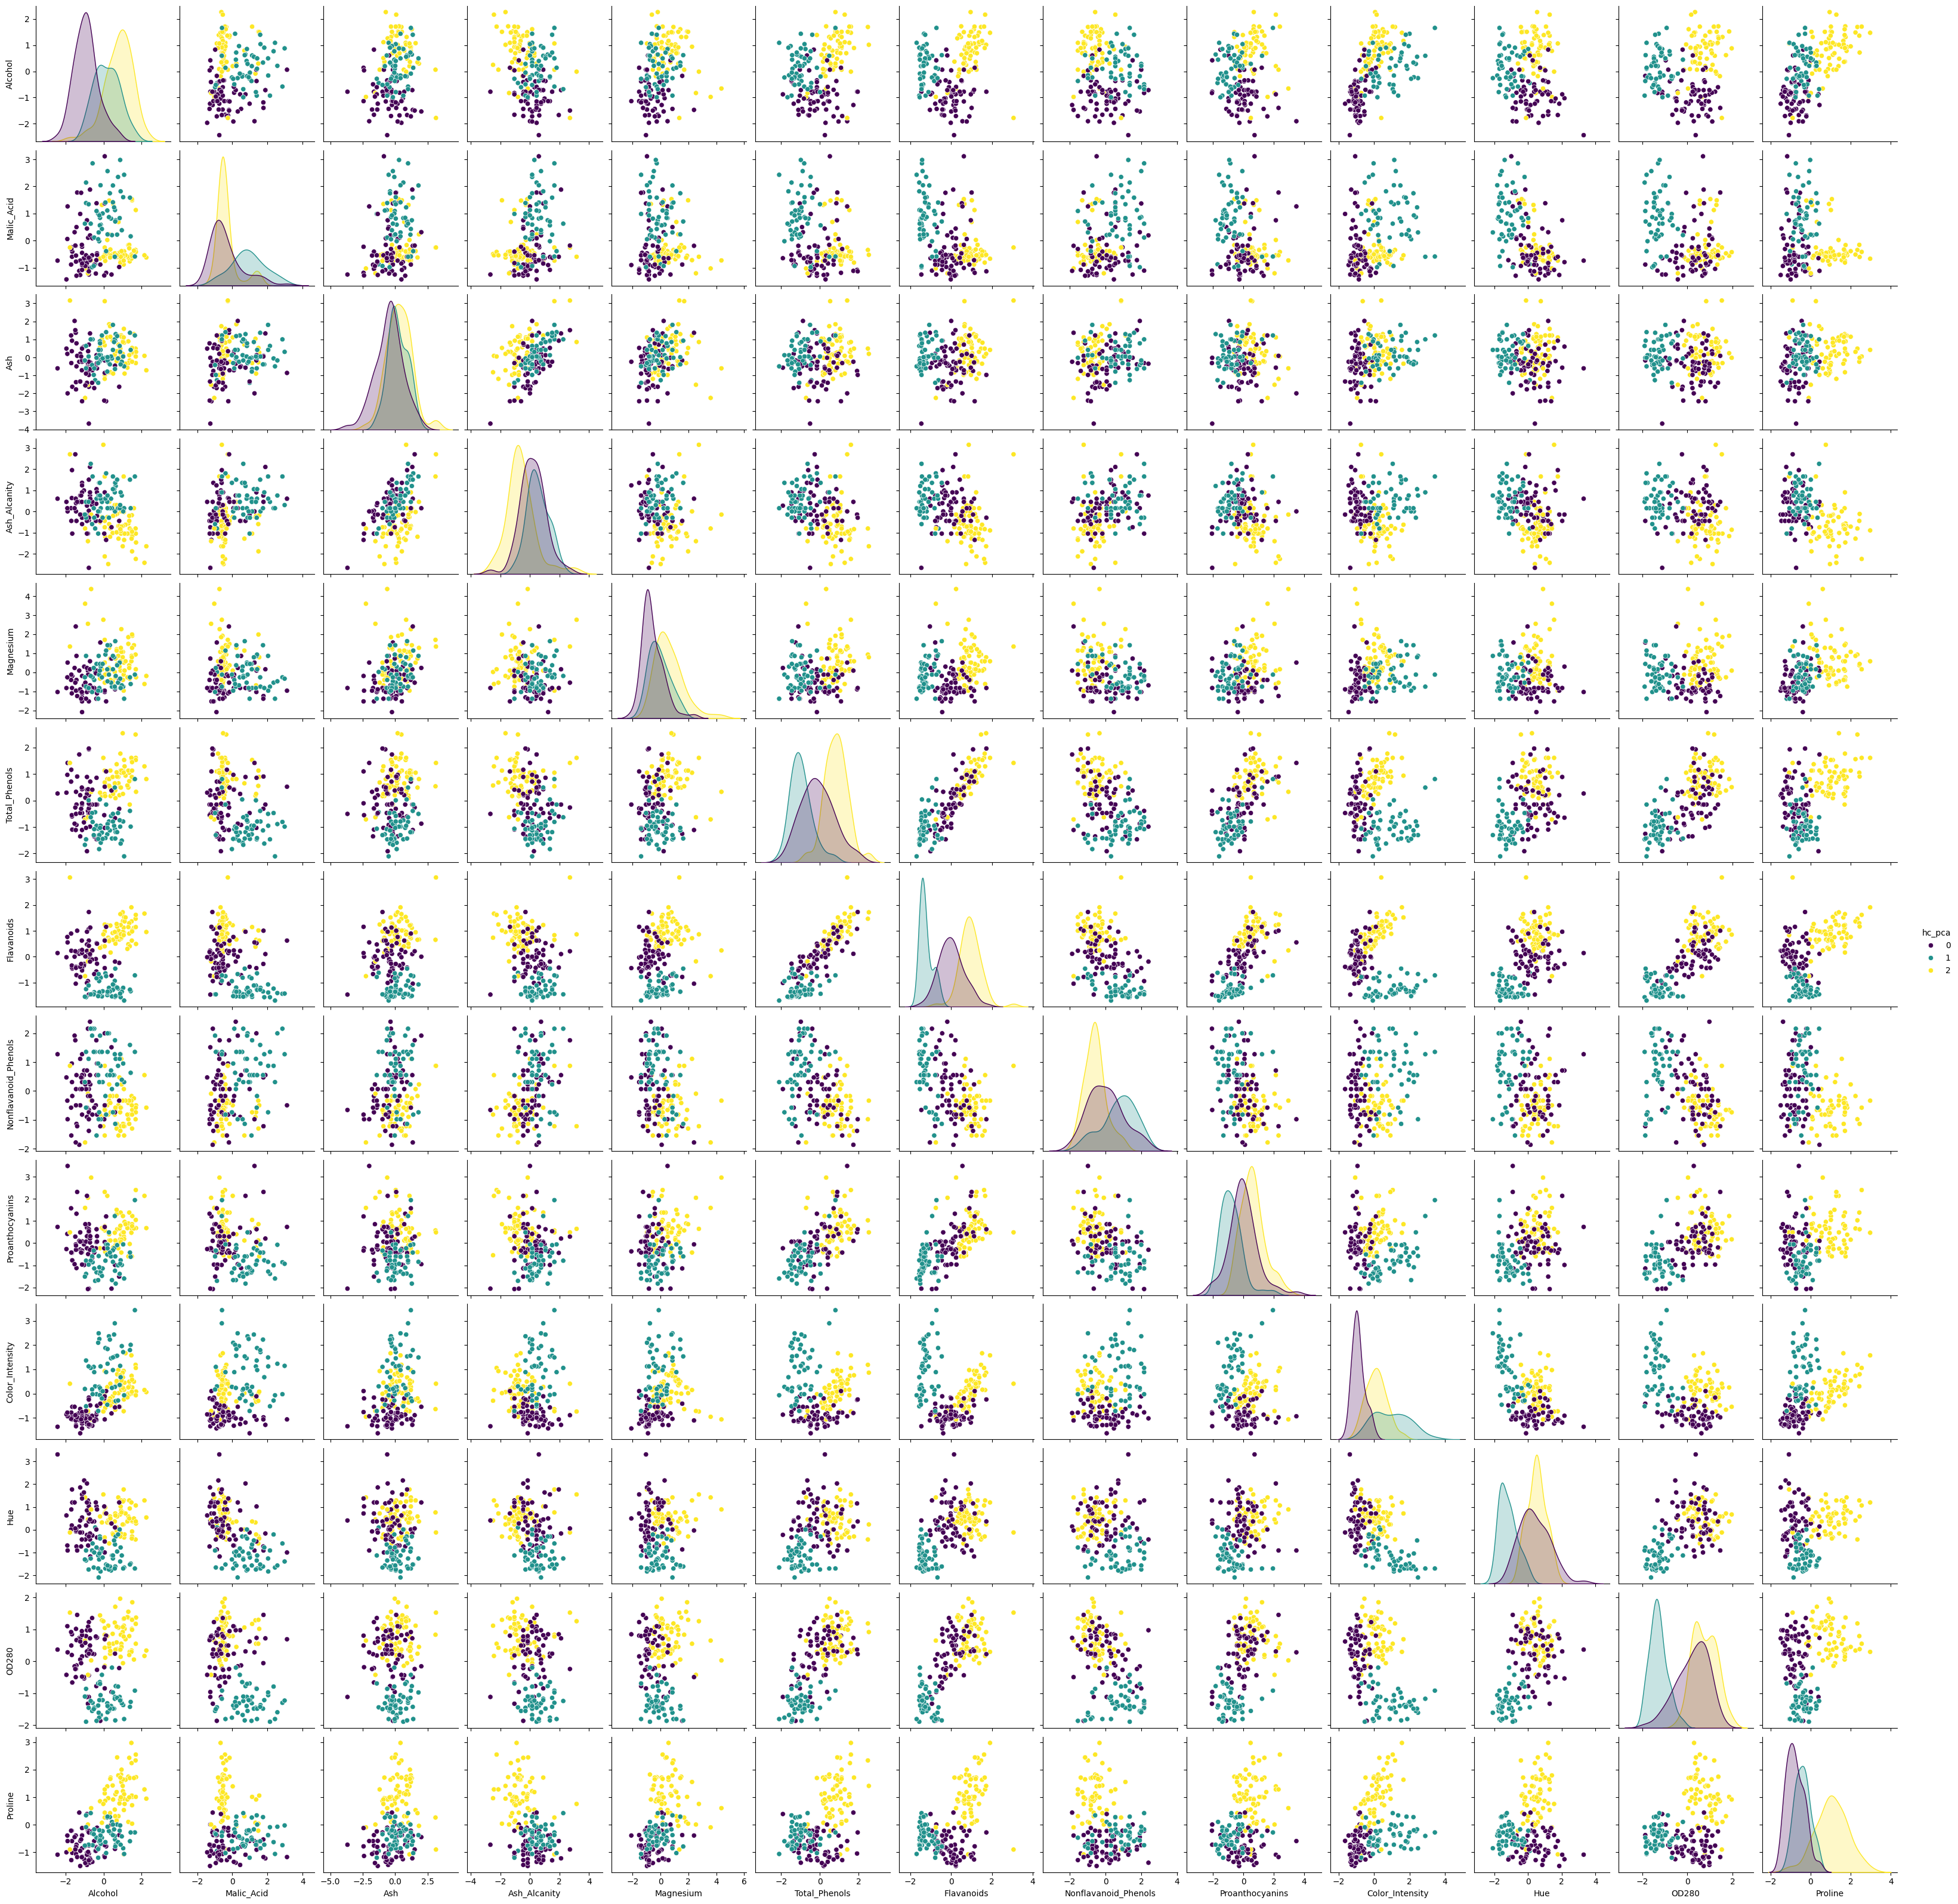

In [91]:
sns.pairplot(data = df_scaled[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'hc_pca']], hue = 'hc_pca', palette = 'viridis')

GRAFICAMOS LOS CLUSTERS CON ALGUNAS VARIABLES


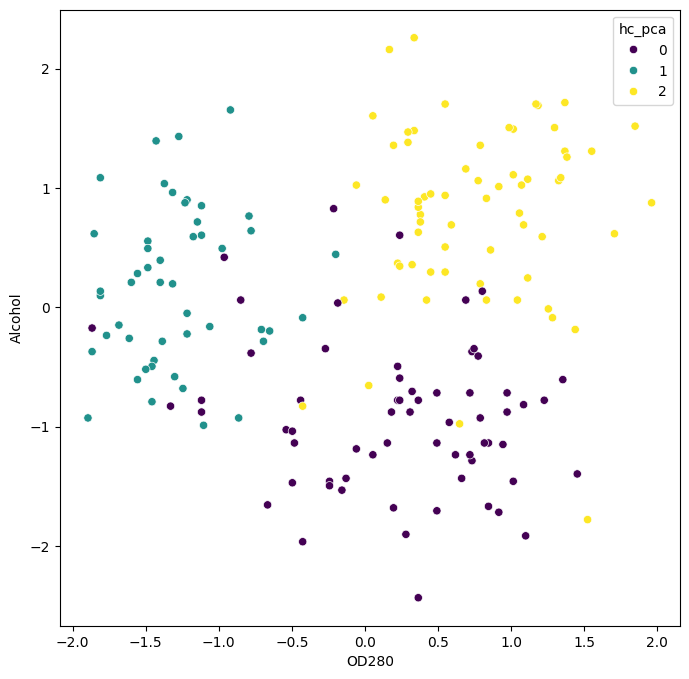

In [98]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data = df_scaled,x ='OD280', y = 'Alcohol',hue = 'hc_pca', palette = 'viridis' )
plt.show()

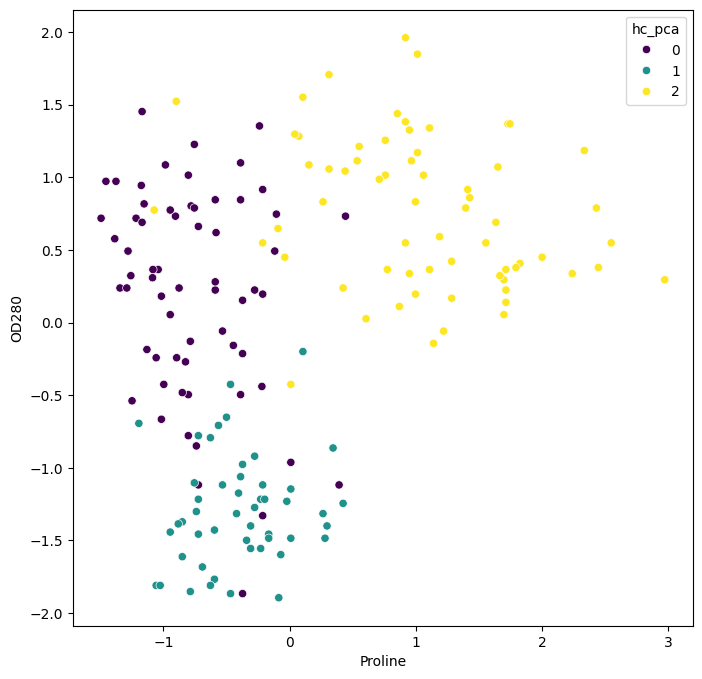

In [102]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data = df_scaled, x = 'Proline', y = 'OD280' ,hue = 'hc_pca', palette = 'viridis' )
plt.show()

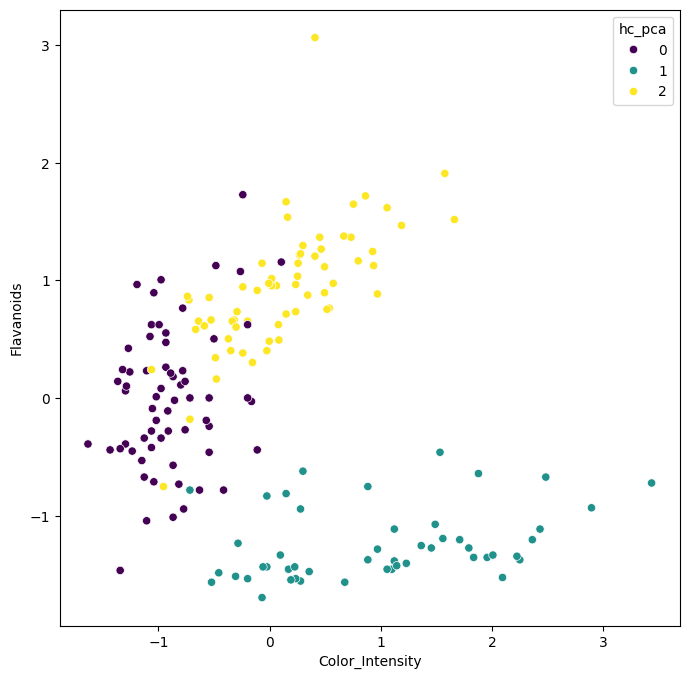

In [111]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data = df_scaled, x = 'Color_Intensity', y = 'Flavanoids' ,hue = 'hc_pca', palette = 'viridis' )
plt.show()